# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | conversion of categories to binary columns |
| **Feature selection*** | choice of specific variables that may most impact the model  |
| **Classifier** | model to assign inputs to specific categories |
| **Precision** | (true positive) / (true positive + false positives) |
| **Recall** | (true positive) / (true positive + false negatives) |
| **F1 Score** | 2* (precision*recall)/(precision + recall) |
| **Parsimonious model** | the most simple possible model to explain the data |
| **Ridge regression** | addition of penalty term to prevent overfitting |
| **LASSO regression** | use of penalty variables to remove features |
| **Cross validation** | testing of a model to see how it fairs for data not already in the model|
| **Tree based methods** | based on decision trees as a method of prediction |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) A perfect classifier makes a rectangle while a bad classifier makes a line in the form y=x.


b) If the F1 score is close to 1, this means it is a perfect classifier while a score close to 0 is a bad classifier.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | line | half curve |
| **Dependent Variable Type** | numeric | categorial |
| **Purpose** (regression or classification) | regression | classification |
| **Range of output variable** ($y_i$ or $p_i$) | $y_i$ | $p_i$ |
| **Method*** | OSL | Maximum likelihood estimation |
| **Example of use** |estimation of a price of a house  | prediction of whether certain students will pass |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

- This is important so that the model does not see all the data which would result in it poorly predicting and testing data.
- This is done by first loading, cleaning, and scaling the data. Then, the data is split for a training set and a testing set. The model is then fit according to the training set only.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [2]:
housing <- read.csv("housing.csv")

In [5]:
housing_lm <- lm(median_house_value ~ total_rooms + median_income + housing_median_age, data=housing)
housing_lm


Call:
lm(formula = median_house_value ~ total_rooms + median_income + 
    housing_median_age, data = housing)

Coefficients:
       (Intercept)         total_rooms       median_income  housing_median_age  
        -24329.879               3.888           42467.039            1974.981  


- linear is approriate as we are trying to calculate a value based on categories

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [6]:
library(dplyr)
library(tibble)

scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_scale <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
train <- runif(nrow(housing_scale)) < 0.75
test <- !train


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#### c) Fit the model.

In [8]:
f = median_house_value ~ longitude + latitude + housing_median_age +
  total_rooms + population + households + median_income

m <- lm(f, data=housing_scale %>% filter(train))
summary(m)


Call:
lm(formula = f, data = housing_scale %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

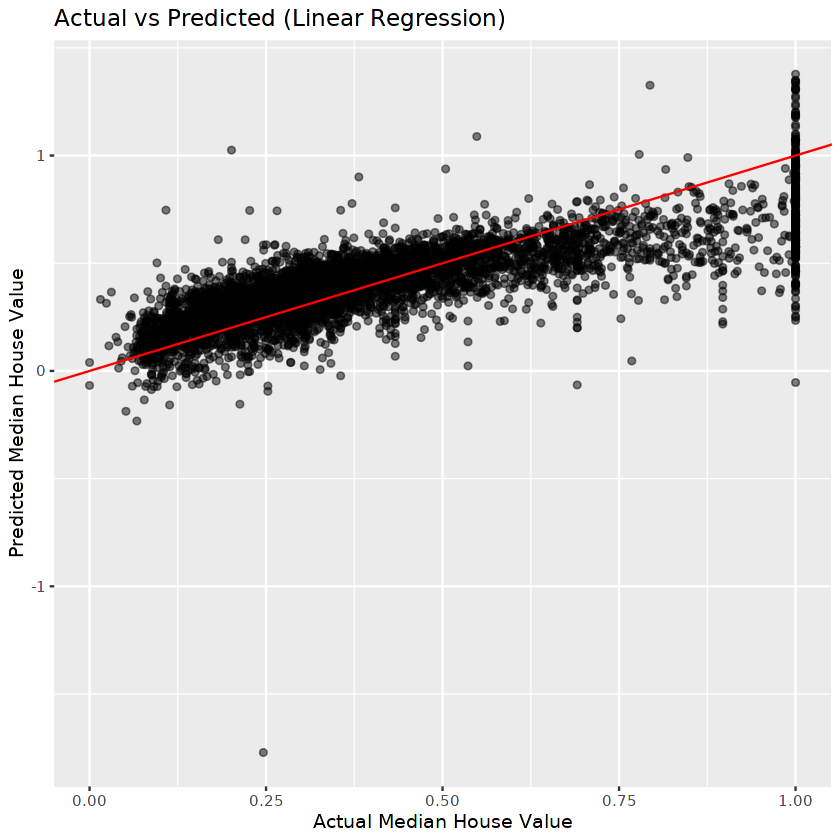

In [10]:
library(ggplot2)

hs <- housing_scale[test, ]

hs <- hs %>%
  mutate(median_house_value_pred = predict(m, newdata = hs))

ggplot(hs, aes(x = median_house_value, y = median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(title = "Actual vs Predicted (Linear Regression)",
       x = "Actual Median House Value",
       y = "Predicted Median House Value")

#### e) Make a residuals plot.

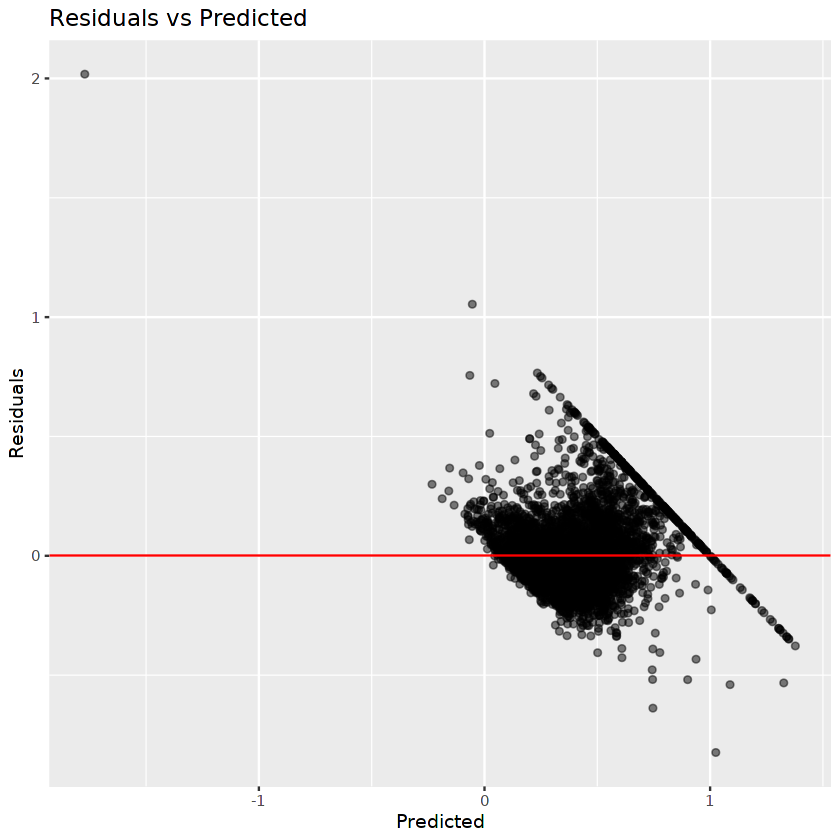

In [11]:
ggplot(hs, aes(x = median_house_value_pred, y = median_house_value - median_house_value_pred)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red") +
  labs(title = "Residuals vs Predicted", x = "Predicted", y = "Residuals")

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?
The outcome variable is binary, so logistic regression is appropriate. 

In [14]:
diabetes <- read.csv("diabetes.csv")

summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [22]:
scale_d <- function(a){
  (a - min(a))/(max(a)-min(a))
}

diabetes_scale <- diabetes %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale_d))

set.seed(123)
n_d <- nrow(diabetes_scale)
train_idx <- sample.int(n_d, size = floor(0.1 * n_d))
diabetes_train <- diabetes_scale %>% slice(train_idx)
diabetes_test  <- diabetes_scale %>% slice(setdiff(seq_len(n_d), train_idx))

diabetes_train %>% write.csv("diabetes_train.csv")
diabetes_test  %>% write.csv("diabetes_test.csv")

#### c) Fit the model.

In [23]:
fit <- Outcome ~ .
model_log <- glm(fit, data = diabetes_train, family = binomial())

summary(model_log)


Call:
glm(formula = fit, family = binomial(), data = diabetes_train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of 

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [27]:
p_d <- predict(model_log, newdata = diabetes_test, type = "response")
pred <- as.integer(p_d >= 0.5)
truth <- diabetes_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

diabetes_measured <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

diabetes_measured

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?
The most important variables are pregnancies, glucose, and BMI. The accuracy increases with the LASSO model.

In [30]:
library(glmnet)

X_train <- model.matrix(Outcome ~ ., diabetes_train)[, -1]  
y_train <- diabetes_train$Outcome
X_test  <- model.matrix(Outcome ~ ., diabetes_test)[, -1]
y_test  <- diabetes_test$Outcome

set.seed(123)
cv_lasso <- cv.glmnet(X_train, y_train, alpha = 1, family = "binomial")

plot(cv_lasso)
title("LASSO Cross-Validation", line = 2.5)

cv_lasso$lambda.min

coef(cv_lasso, s = "lambda.min")

lasso_pred_prob <- predict(cv_lasso, newx = X_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_prob >= 0.5)

tp <- sum(lasso_pred == 1 & y_test == 1)
fp <- sum(lasso_pred == 1 & y_test == 0)
tn <- sum(lasso_pred == 0 & y_test == 0)
fn <- sum(lasso_pred == 0 & y_test == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

ERROR: Error in library(glmnet): there is no package called ‘glmnet’


#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'


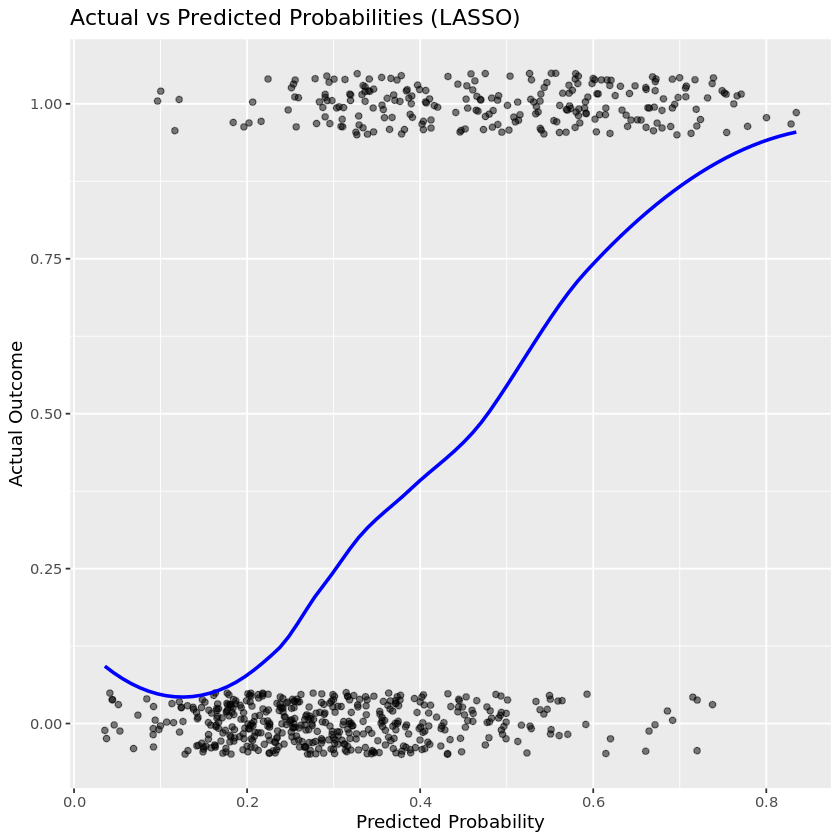

In [11]:
ggplot(data.frame(y_test, lasso_pred_prob),
       aes(x = lasso_pred_prob, y = y_test)) +
  geom_jitter(height = 0.05, alpha = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "blue") +
  labs(title = "Actual vs Predicted Probabilities (LASSO)",
       x = "Predicted Probability", y = "Actual Outcome")